## Observations and Insights 

1. There was almost an equal amouunt of male and female mice.
2. Regiments Capomulin and Ramicane on average has smaller tumor volumes compared to Infubinol and Ceftamin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False).sort_values()

0       False
1268    False
1267    False
1266    False
1265    False
        ...  
911      True
910      True
909      True
917      True
912      True
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_df = cleaned_df.groupby("Drug Regimen")

tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_std = regimen_df["Tumor Volume (mm3)"].std()
tumor_sem = regimen_df["Tumor Volume (mm3)"].sem()

regimen_summary_df = pd.DataFrame([tumor_mean,tumor_median,tumor_var,tumor_std,tumor_sem]).T
regimen_summary_df.columns = ["Tumor Volume Mean",
                      "Tumor Volume Median",
                      "Tumor Volume Variance",
                      "Tumor Volume Std. Dev.",
                      "Tumor Volume Std. Err."]
regimen_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg_df = cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var','std', 'sem'])
regimen_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

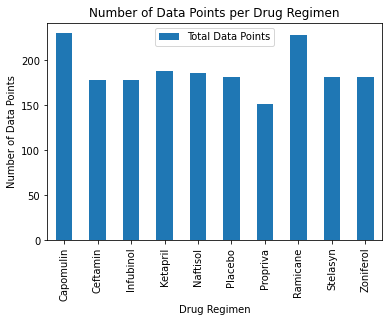

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = regimen_df["Drug Regimen"].count()
total_timepoints_df = pd.DataFrame(timepoints)
total_timepoints_df.columns = ["Total Data Points"]

total_timepoints_df.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.title("Number of Data Points per Drug Regimen")

plt.show()

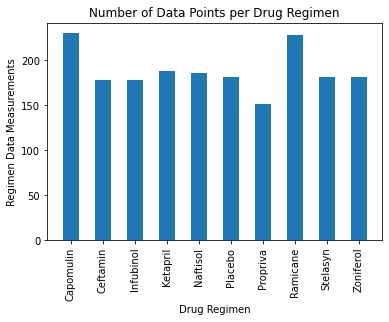

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoints.index, timepoints, width=0.5, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Data Measurements")

plt.xticks(rotation=90)
plt.title("Number of Data Points per Drug Regimen")

plt.show()

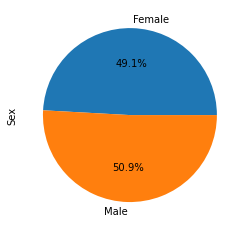

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = cleaned_df.groupby("Sex")
gender_count = gender_df["Sex"].count()
gender_plot = gender_count.plot(kind = "pie", autopct="%1.1f%%")

plt.show()

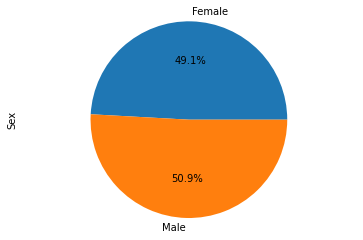

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [gender_count["Female"],gender_count["Male"]]

plt.pie(count, labels = labels, autopct="%1.1f%%")

plt.ylabel("Sex")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_final = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
ramicane_final = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
infubinol_final = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
ceftamin_final = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_time = cleaned_df.groupby("Mouse ID")
last_time = last_time["Timepoint"].max()
last_time_df = pd.DataFrame(last_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_volume = pd.merge(last_time_df, cleaned_df, on=["Mouse ID", "Timepoint"])
last_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

volume_list = []

for drug in treatments:
    last_tumor_vol = cleaned_df.loc[cleaned_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    volume_list.append(last_tumor_vol)
    
    quartiles = last_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    mean = last_tumor_vol.mean()
    iqr = upperq-lowerq  
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = last_tumor_vol.loc[(last_tumor_vol < lower_bound) | (last_tumor_vol > upper_bound)]
    
    print(f"{drug}")
    print(f"Last tumor volume for {drug} below {lower_bound} could be outliers.")
    print(f"Last tumor volume for {drug} above {upper_bound} could be outliers.")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f"Outlier last tumor volume is {outliers[i]}")
    print("--------")

Capomulin
Last tumor volume for Capomulin below 26.714832162499995 could be outliers.
Last tumor volume for Capomulin above 55.9711007025 could be outliers.
Number of outliers for Capomulin is: 2
Outlier last tumor volume is 25.47214326
Outlier last tumor volume is 23.34359787
--------
Ramicane
Last tumor volume for Ramicane below 24.18658646249998 could be outliers.
Last tumor volume for Ramicane above 57.48804812250001 could be outliers.
Number of outliers for Ramicane is: 1
Outlier last tumor volume is 22.05012627
--------
Infubinol
Last tumor volume for Infubinol below 32.309217298749985 could be outliers.
Last tumor volume for Infubinol above 72.31757996875001 could be outliers.
Number of outliers for Infubinol is: 0
--------
Ceftamin
Last tumor volume for Ceftamin below 32.818911426250004 could be outliers.
Last tumor volume for Ceftamin above 71.19095325625 could be outliers.
Number of outliers for Ceftamin is: 0
--------


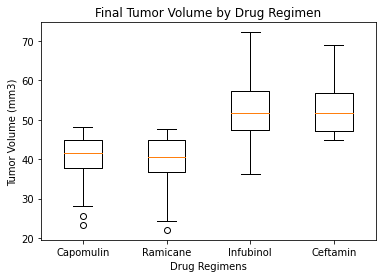

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

ax1.set_title("Final Tumor Volume by Drug Regimen")

ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimens")

ax1.boxplot(volume_list)
ax1.set_xticklabels(treatments)

plt.show()

## Line and Scatter Plots

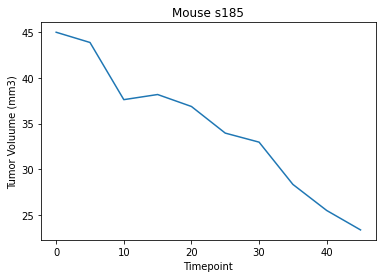

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"].head()
#s185

s185_tumor = cleaned_df.loc[cleaned_df["Mouse ID"]=="s185"]
#s185_tumor

plt.plot(s185_tumor["Timepoint"], s185_tumor["Tumor Volume (mm3)"])

plt.title("Mouse s185")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Voluume (mm3)")

plt.show()

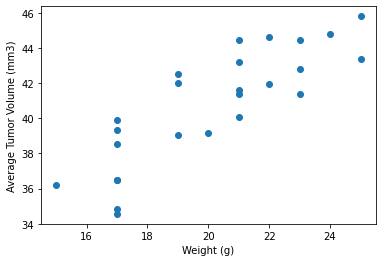

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")

capo_avg = capomulin["Tumor Volume (mm3)"].mean()

weight = capomulin["Weight (g)"].unique()

plt.scatter(weight, capo_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

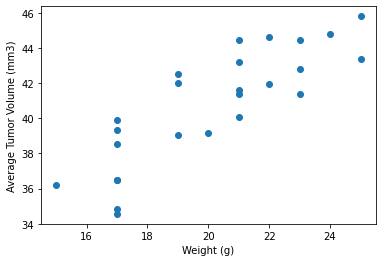

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")

capo_avg = capomulin["Tumor Volume (mm3)"].mean()

weight = capomulin["Weight (g)"].unique()



plt.scatter(weight, capo_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()